# CREDIT CARD FRAUD DETECTION

## Setup

In [8]:
# Import required libraries
%matplotlib inline
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np                # array and math functions 
import matplotlib.pyplot as plt   # plotting
import seaborn as sns
plt.style.use('ggplot')
import keras

np.random.seed(2)

In [3]:
# Load the datset
df = pd.read_csv('creditcard.csv')

## Data Exploration

In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134093,80644.0,1.177076,0.578651,-0.376805,1.066586,0.454467,-0.208963,0.125942,0.048391,-0.359636,...,0.008581,0.107824,-0.145692,-0.410072,0.640612,-0.295782,0.045736,0.034862,1.00,0
168461,119233.0,1.485691,-1.231038,-1.341142,0.224068,-0.196184,0.203150,-0.011050,-0.024894,0.573556,...,0.169273,-0.050766,-0.065566,0.256739,-0.320972,0.486349,-0.116506,-0.013794,291.79,0
130667,79404.0,1.013965,-0.224891,-0.241991,0.388212,-0.032363,-0.272388,0.264738,0.049440,-0.192538,...,-0.280633,-1.165864,0.049842,-0.347499,0.132492,0.164762,-0.082554,0.007635,112.90,0
11619,19912.0,-0.835969,0.424841,2.191436,-0.413210,-0.542720,-0.238319,0.185999,-0.697616,0.801993,...,-0.041520,0.337707,-0.089669,0.576879,-0.271118,-0.295633,-1.049886,-0.291614,5.00,0
95984,65552.0,0.866439,-0.154042,1.378797,2.404108,-0.071707,2.485142,-1.075264,0.990476,0.051458,...,0.077049,0.386492,0.164811,-1.055984,-0.101331,0.070940,0.098178,0.010301,15.18,0


In [5]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Exploratory Data Analysis (EDA)

We will focus our analysis on non-anonymized predictors: time and amount.

In [10]:
# Numerical summary of non-anonymized predictors 
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/home/mzamora/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


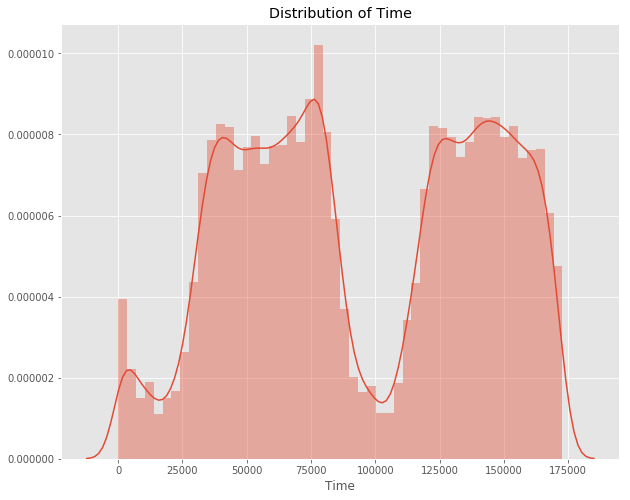

In [12]:
# Visualization of time and amount distribution
plt.figure(figsize=(10,8))
plt.title('Distribution of Time')
sns.distplot(df.Time)

The time is recorded in the number of seconds since the first transaction in the dataset

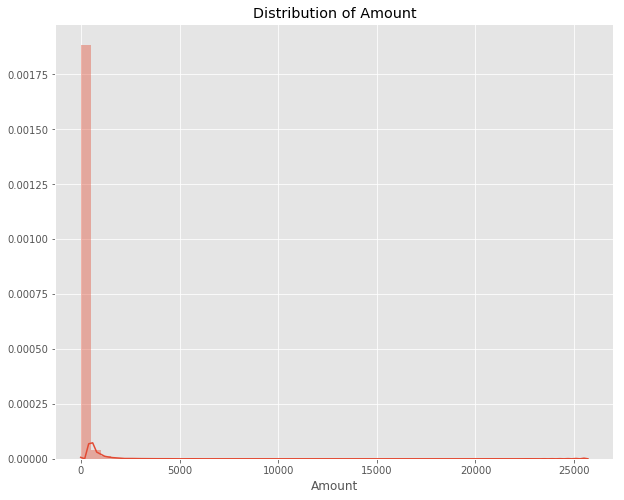

In [13]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df.Amount)

In [16]:
# Fraud vs. Legitimate transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent)) * 100
perc_fraudulent = (fraudulent/(normal+fraudulent)) * 100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

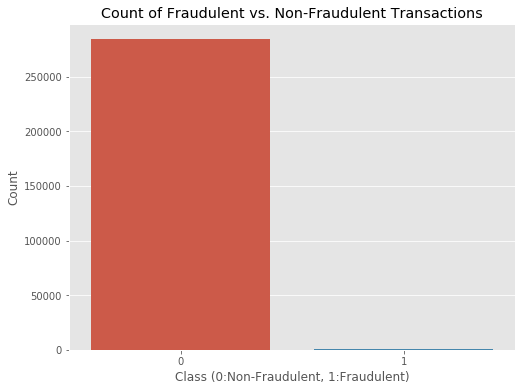

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [18]:
# Correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5,1,'Heatmap of Correlation')

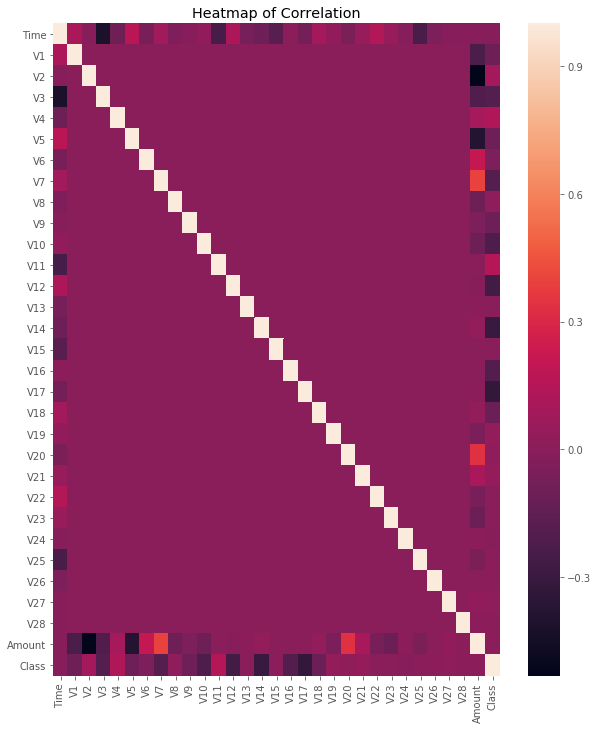

In [19]:
# Heatmap
corr = df.corr()
plt.figure(figsize=(10,12))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

## Data Preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler
df['normalized_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis=1)

KeyError: 'Amount'

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliized_amount
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073


In [38]:
df = df.drop(['Time'], axis=1)

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliized_amount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073


## Splitting the dataset

In [41]:
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [43]:
print(X)

            V1      V2     V3     V4     V5     V6     V7     V8     V9  \
0       -1.360  -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364   
1        1.192   0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255   
2       -1.358  -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515   
3       -0.966  -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387   
4       -1.158   0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818   
5       -0.426   0.961  1.141 -0.168  0.421 -0.030  0.476  0.260 -0.569   
6        1.230   0.141  0.045  1.203  0.192  0.273 -0.005  0.081  0.465   
7       -0.644   1.418  1.074 -0.492  0.949  0.428  1.121 -3.808  0.615   
8       -0.894   0.286 -0.113 -0.272  2.670  3.722  0.370  0.851 -0.392   
9       -0.338   1.120  1.044 -0.222  0.499 -0.247  0.652  0.070 -0.737   
10       1.449  -1.176  0.914 -1.376 -1.971 -0.629 -1.423  0.048 -1.720   
11       0.385   0.616 -0.874 -0.094  2.925  3.317  0.470  0.538 -0.559   
12       1.250  -1.222  0

In [44]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [47]:
X_train.shape

(199364, 29)

In [48]:
X_test.shape

(85443, 29)

In [49]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Use Deep Neural Network instead of Regression Models

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [51]:
model = Sequential([
    Dense(units=16, input_dim = 29, activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

## Training the model

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 82s 410us/step - loss: 0.0096 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 61s 307us/step - loss: 0.0040 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 67s 338us/step - loss: 0.0036 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 66s 332us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 64s 321us/step - loss: 0.0033 - acc: 0.9994


## Model Evaluation

In [54]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 2s 29us/step
[0.0044854080100861365, 0.9994265182636377]


## Confussion Matrix

In [63]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [65]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color = "white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [57]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [59]:
print(cnf_matrix)

[[85279    17]
 [   32   115]]


Confusion matrix without normalization
[[85279    17]
 [   32   115]]


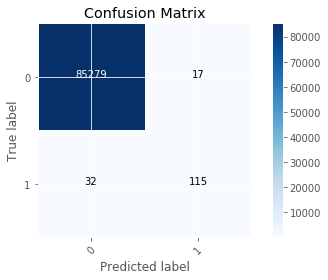

In [66]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Confusion matrix without normalization
[[284252     63]
 [    94    398]]


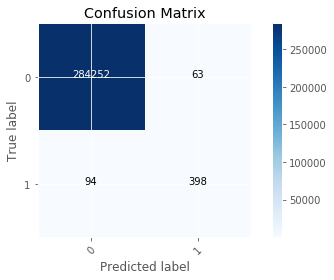

In [67]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Classification Algorithms

In [75]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [78]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_validation:
 (199364, 29) (85443, 29) 

Y_shapes:
 Y_train: Y_validation:
 (199364, 1) (85443, 1)


In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Spot-checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972597 (0.015404)
LDA: 0.979887 (0.011868)
KNN: 0.921744 (0.019282)
CART: 0.885099 (0.027715)
SVM: 0.933068 (0.031332)
XGB: 0.982219 (0.013763)


/home/mzamora/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mzamora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mzamora/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mzamora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

RF: 0.927611 (0.019095)


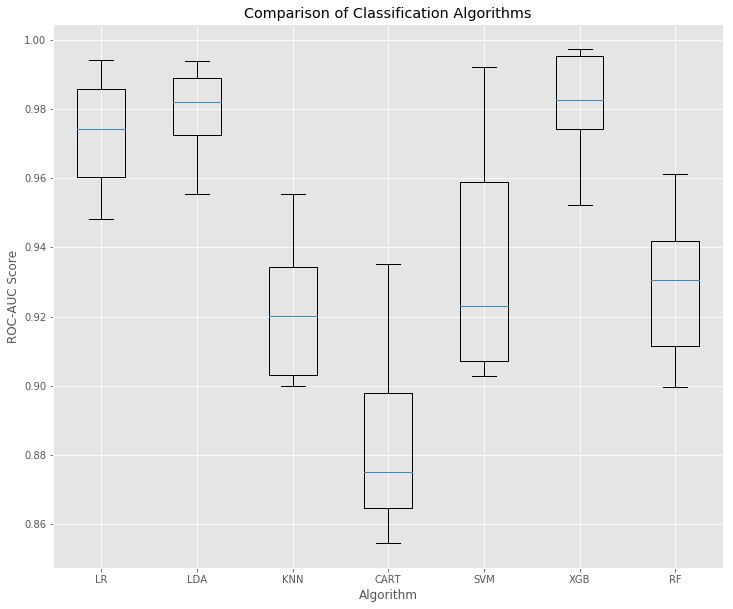

In [82]:
# Compare Algorithms
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()